# 本机和530/TH实验结果

In [2]:
import numpy as np
import pandas as pd
import pylab as pl
from pylab import *
import plotly.offline as py
#import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.io as pio
import inspect, re
from plotly.subplots import make_subplots
# py.init_notebook_mode(connected=True)
def varname(p):
	for line in inspect.getframeinfo(inspect.currentframe().f_back)[3]:
		m = re.search(r'\bvarname\s*\(\s*([A-Za-z_][A-Za-z0-9_]*)\s*\)', line)
	if m:
		return m.group(1)

In [30]:
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'plotly', 'plotly_white', 'plotly_dark',
         'presentation', 'xgridoff', 'none']

In [74]:
segements=5
colors=[
    '#1f77b4',  # muted blue
    '#ff7f0e',  # safety orange
    '#2ca02c',  # cooked asparagus green
    '#d62728',  # brick red
    '#9467bd',  # muted purple
    '#8c564b',  # chestnut brown
    '#e377c2',  # raspberry yogurt pink
    '#7f7f7f',  # middle gray
    '#bcbd22',  # curry yellow-green
    '#17becf'   # blue-teal
]
def prepare_data(path,batchsize=512):
    batch_size = batchsize
    iterations = ceil(50000/batch_size)
#     segements=5
    group_len = iterations/segements
    df = pd.read_csv(path)
    df['segament'] = (df['index']/(group_len)).astype('int')
    df.timestamp=pd.to_datetime(df.timestamp)
    df['time_cost']=df.timestamp-df.iloc[0].timestamp
    df.time_cost=df.time_cost/ pd.offsets.Minute(1)
    return df.groupby(['segament']).mean().copy()

# 查看train accuracy
def train_acc(datas, labels):
    go_data = []
    for data,label in zip(datas,labels):
        tmp = go.Scatter(
            x=data.index/segements if '_8' not in label else data.index/segements*2,
            y=data.training_accuracy,
            text='train acc',
            name=label
        )
        go_data.append(tmp)
    layout=go.Layout(title="train_acc", xaxis={'title':'Epochs'}, yaxis={'title':'%'},template="presentation")
    figure=go.Figure(data=go_data,layout=layout)
    py.iplot(figure)

# 查看train loss
def train_loss(datas, labels):
    go_data = []
    for data,label in zip(datas,labels):
        tmp = go.Scatter(
            x=data.index/segements if '_8' not in label else data.index/segements*2 ,
            y=data.training_loss,
            text='train loss',
            name=label
        )
        go_data.append(tmp)
    layout=go.Layout(margin=dict(t=10),template="presentation",xaxis={'title':'Epochs','mirror':True,'ticks':'inside','showline':True,'rangemode':"tozero"}, yaxis={'title':'Loss','mirror':True,'ticks':'inside','showline':True,'rangemode':"tozero"},legend=dict(x=0.7,y=0.9,bordercolor='#000000',
        borderwidth=2))
    figure=go.Figure(data=go_data,layout=layout)
    py.iplot(figure,)
    pio.write_image(figure, 'training_loss.png',scale=2)

# test accuracy
def test_acc(datas, labels):
    go_data = []
    for data,label in zip(datas,labels):
        data = data[data['test_loss']>0]
        tmp = go.Scatter(
            x=data.index/segements if '_8' not in label else data.index/segements*2 ,
            y=data.test_accuracy,
            text='test acc',
            name=label
        )
        go_data.append(tmp)
    layout=go.Layout(margin=dict(t=10),template="presentation",xaxis={'title':'Epochs','mirror':True,'ticks':'inside','showline':True,}, yaxis={'title':'Accuracy','mirror':True,'ticks':'inside','showline':True},legend=dict(x=0.7,y=0.1,bordercolor='#000000',
        borderwidth=2))
    figure=go.Figure(data=go_data,layout=layout)
    py.iplot(figure)
    pio.write_image(figure, 'test_acc.png',scale=2)
#     py.plot(figure,image='svg',filename='test_acc.html')
# 查看test loss
def test_loss(datas, labels):
    go_data = []
    for data,label in zip(datas,labels):
        data = data[data['test_loss']>0]
        tmp = go.Scatter(
            x=data.index/segements if '_8' not in label else data.index/segements*2 ,
            y=data.test_loss/10,
            name=label,
            text='test loss'
        )
        go_data.append(tmp)
    layout=go.Layout(margin=dict(t=10),template="presentation",xaxis={'title':'Epochs','mirror':True,'ticks':'inside','showline':True,}, yaxis={'title':'Loss','mirror':True,'ticks':'inside','showline':True},legend=dict(x=0.7,y=0.9,bordercolor='#000000',
        borderwidth=2))
    figure=go.Figure(data=go_data,layout=layout)
    py.iplot(figure,)
    pio.write_image(figure, 'test_loss.png',scale=2)

def subplot(datas,labels):
    grid = make_subplots(rows=1, cols=2)
    go_data = []
    color_idx=0
    for data,label in zip(datas,labels):
        data = data[data['test_loss']>0]
        tmp = go.Scatter(
            x=data.index/segements if '_8' not in label else data.index/segements*2 ,
            y=data.test_loss/10,
            legendgroup=label,
            name=label,
#             color=colors[color_idx],
            text='test loss'
        )
#         print(tmp)
        grid.append_trace(tmp,row=1,col=1)
        go_data.append(tmp)
        color_idx+=1
    for data,label in zip(datas,labels):
        data = data[data['test_loss']>0]
        tmp = go.Scatter(
            x=data.index/segements if '_8' not in label else data.index/segements*2 ,
            y=data.test_loss/10,
            legendgroup=label,
            name=label,
            showlegend = False,
            marker=dict(
                color=colors[color_idx],
            ),
            text='test loss'
        )
#         print(tmp)
        grid.append_trace(tmp,row=1,col=2)
        go_data.append(tmp)
        color_idx+=1
    layout=go.Layout(margin=dict(t=10),xaxis={'title':'Epochs','mirror':True,'ticks':'inside','showline':True,}, yaxis={'title':'Loss','mirror':True,'ticks':'inside','showline':True},legend=dict(x=0.7,y=0.9,bordercolor='#000000',
        borderwidth=2))
    figure=go.Figure(data=go_data,layout=layout)
#     print(go_data)
    grid.update_layout(height=600, width=800, title_text="Subplots")
    grid.show()


In [75]:
# resnet-18
# single_node = prepare_data('/share/distbelief/log/gpu.csv')
sgd = prepare_data('~/share/DGS/log/result/gpu_ResNet18_m0.7_e50_b256.csv')
# ds_node_1 = prepare_data('/share/distbelief/log/gpu.csv')
our = prepare_data('~/share/DGS/log/result/node2_gradient_sgd_ResNet18_m0.7_e50_b64_4worker_0.9355.csv')
# worker_4_dual = prepare_data('/share/distbelief/log/result/node0_gradient_sgd_ResNet18_m0.7_e50_b64_4worker_dual_0.9305.csv')
# worker_8 = prepare_data('/share/distbelief/log/result/node0_gradient_sgd_ResNet18_m0.7_e50_b64_8worker.csv')
asgd = prepare_data('~/share/DGS/log/result/node0_asgd_ResNet18_m0.7_e50_b64_4worker.csv')
DGC = prepare_data('~/share/DGS/log/result/node3_dgc_ResNet18_m0.7_e50_b64_4worker_0.9316.csv')
# dgc_node_8 = prepare_data('/share/distbelief/log/result/node0_dgc_ResNet18_m0.7_e50_b64_8worker.csv')

GradientDropping = prepare_data('~/share/DGS/log/result/node0_Aji_ResNet18_m0.7_e50_b64_4worker.csv')
datas_str = '[sgd,our,asgd,DGC,GradientDropping]'
datas=eval(datas_str)
labels=[i.replace('[','').replace(']','') for i in datas_str.split(',')]
# as_node_2_train_data = as_node_2.groupby(['segament']).mean()
# single_node_train_data.index = single_node_train_data.index/2
# train_acc(datas,labels)
# train_loss(datas,labels)
# test_acc(datas,labels)
# test_loss(datas,labels)
subplot(datas,labels)

In [15]:
# resnet-18 32worker
# single_node = prepare_data('/share/distbelief/log/gpu.csv')
sgd = prepare_data('/share/distbelief/log/result/gpu_ResNet18_m0.7_e50_b256.csv',batchsize=256)
# ds_node_1 = prepare_data('/share/distbelief/log/gpu.csv')
our = prepare_data('/share/distbelief/log/node14_gradient_sgd_ResNet18_m0.3_e50_b16_32worker_0.9374.csv')
asgd = prepare_data('/share/distbelief/log/result/node30_asgd_ResNet18_m0.7_e50_b16_32worker_0.8836.csv')
DGC = prepare_data('/share/distbelief/log/result/node12_dgc_ResNet18_m0.3_e50_b16_32worker_0.9258.csv')

GradientDropping = prepare_data('/share/distbelief/log/result/node26_aji_ResNet18_m0.7_e50_b16_32worker_0.91.csv')
datas_str = '[sgd,our,asgd,DGC,GradientDropping]'
datas=eval(datas_str)
labels=[i.replace('[','').replace(']','') for i in datas_str.split(',')]
# as_node_2_train_data = as_node_2.groupby(['segament']).mean()
# single_node_train_data.index = single_node_train_data.index/2
train_acc(datas,labels)
train_loss(datas,labels)
test_acc(datas,labels)
test_loss(datas,labels)

FileNotFoundError: [Errno 2] File b'/share/distbelief/log/result/gpu_ResNet18_m0.7_e50_b256.csv' does not exist: b'/share/distbelief/log/result/gpu_ResNet18_m0.7_e50_b256.csv'

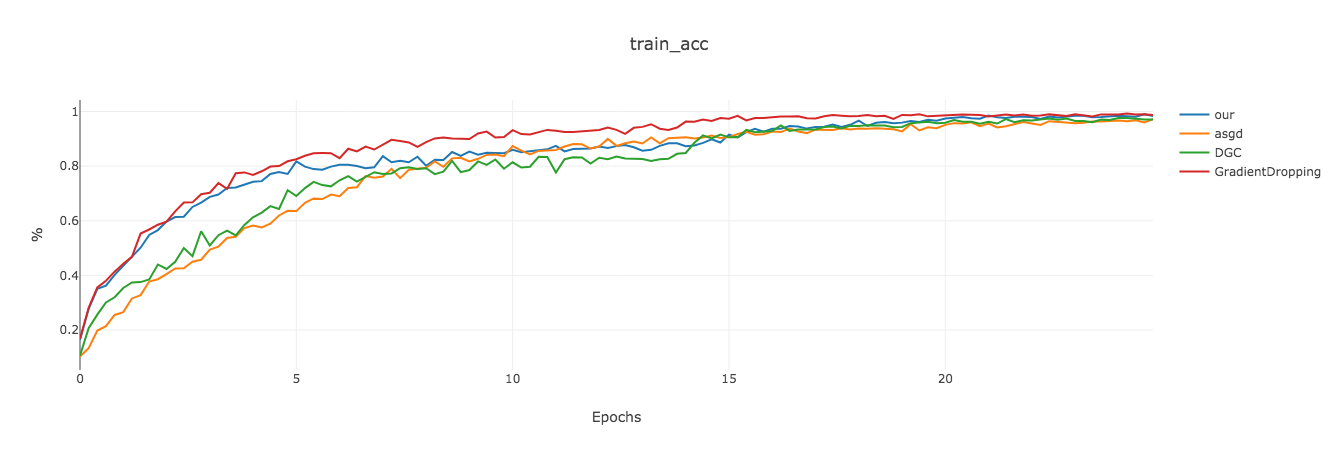

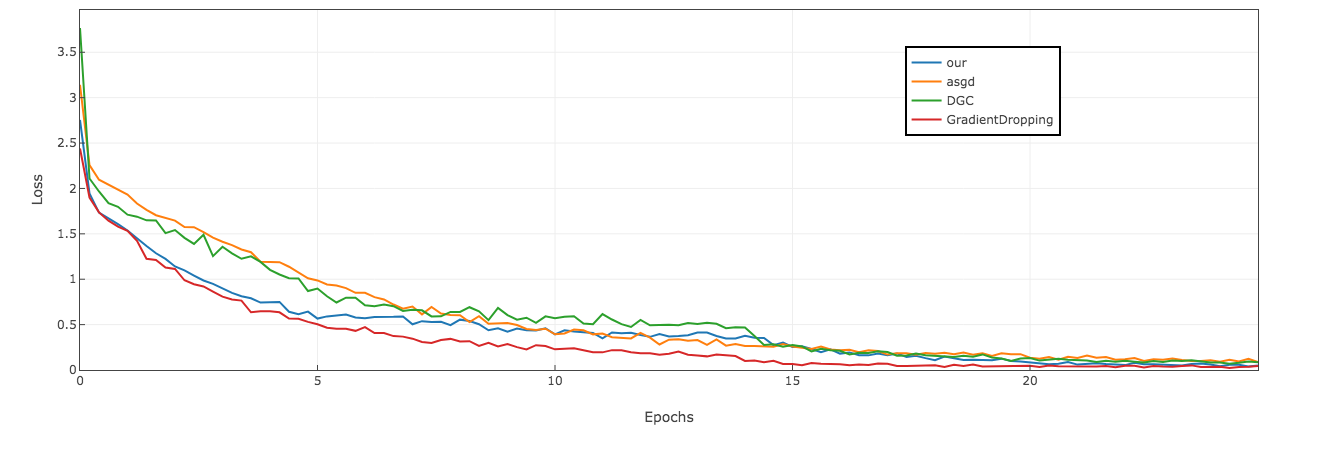

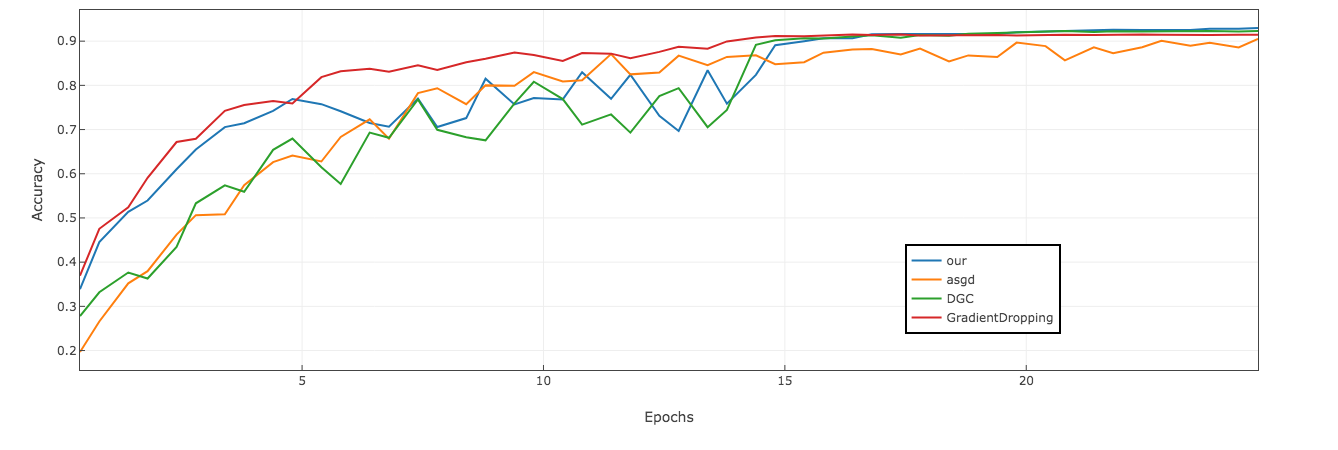

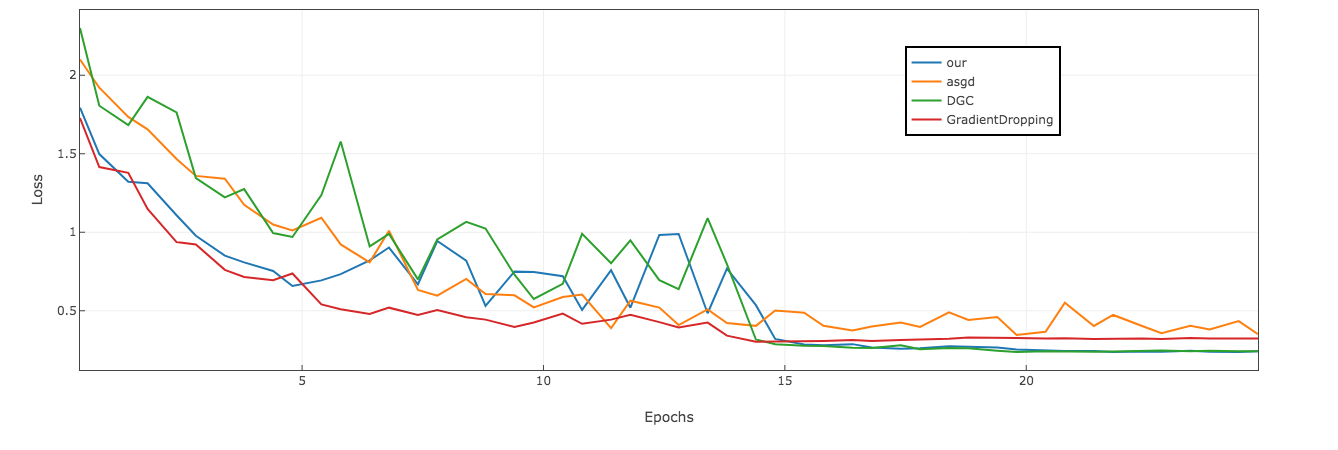

In [98]:
# resnet-18 16worker
# single_node = prepare_data('/share/distbelief/log/gpu.csv')
# sgd = prepare_data('/share/distbelief/log/result/gpu_ResNet18_m0.7_e50_b256.csv')
# ds_node_1 = prepare_data('/share/distbelief/log/gpu.csv')
our = prepare_data('/share/distbelief/log/result/node11_gradient_sgd_ResNet18_m0.7_e50_b32_16worker_0.9298.csv')
asgd = prepare_data('/share/distbelief/log/result/node15_asgd_ResNet18_m0.7_e50_b32_16worker_0.9053.csv')
DGC = prepare_data('/share/distbelief/log/result/node8_dgc_ResNet18_m0.7_e50_b32_16worker_0.9228.csv')

GradientDropping = prepare_data('/share/distbelief/log/result/node6_aji_ResNet18_m0.7_e50_b32_16worker_0.9143.csv')
datas_str = '[our,asgd,DGC,GradientDropping]'
datas=eval(datas_str)
labels=[i.replace('[','').replace(']','') for i in datas_str.split(',')]
# as_node_2_train_data = as_node_2.groupby(['segament']).mean()
# single_node_train_data.index = single_node_train_data.index/2
train_acc(datas,labels)
train_loss(datas,labels)
test_acc(datas,labels)
test_loss(datas,labels)

In [57]:
# resnet-50
# single_node = prepare_data('/share/distbelief/log/gpu.csv')
single_node = prepare_data('/share/distbelief/log/result/gpu_gradient_sgd_ResNet50_m0.7_e50_b256.csv')
# ds_node_1 = prepare_data('/share/distbelief/log/gpu.csv')
worker_4 = prepare_data('/share/distbelief/log/result/node0_gradient_sgd_ResNet50_m0.7_e50_b64_4worker.csv')
# worker_8 = prepare_data('/share/distbelief/log/result/node0_gradient_sgd_ResNet18_m0.7_e50_b64_8worker.csv')
asgd_4 = prepare_data('/share/distbelief/log/result/node0_asgd_ResNet50_4worker.csv')
dgc_node_4 = prepare_data('/share/distbelief/log/result/node0_dgc_ResNet50_m0.7_e50_b64_4worker.csv')
aji_node_4 = prepare_data('/share/distbelief/log/result/node0_aji_ResNet50_m0.7_e50_b64_4worker.csv')
# as_node_1 = prepare_data('/share/distbelief/log/result.old/node2_gradient_sgd_ResNet18_m0.5_4worker.csv')
# as_node_2 = prepare_data('/share/distbelief/log/node2_async_lr0.05.csv')
# 每100个点平均一次，不然数据太多没法画图
# single_node_train_data = single_node.groupby(['segament']).mean()
# ds_node_1_train_data = ds_node_1.groupby(['segament']).mean()
# ds_node_2_train_data = ds_node_2.groupby(['segament']).mean()
# as_node_1_train_data = as_node_1.groupby(['segament']).mean()
datas_str = '[single_node,worker_4,asgd_4,dgc_node_4,aji_node_4]'
datas=eval(datas_str)
labels=[i for i in datas_str.split(',')]
train_acc(datas,labels)
train_loss(datas,labels)
test_acc(datas,labels)
test_loss(datas,labels)

FileNotFoundError: File b'/share/distbelief/log/result/node0_gradient_sgd_ResNet50_m0.7_e50_b64_4worker.csv' does not exist

In [ ]:
!ls

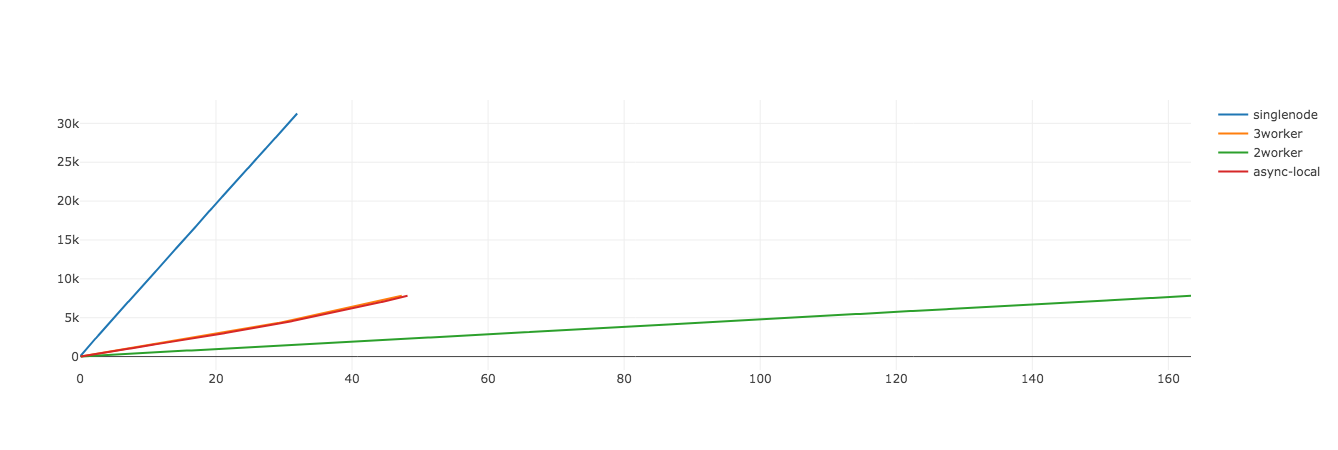

In [273]:
# 查看随着时间的变化，index的变化，说明了节点运行速度的比较
singlenode = go.Scatter(
    x=single_node_train_data.time_cost,
    y=single_node_train_data['index'],
    name='singlenode'
)
dsnode_1 = go.Scatter(
    x=ds_node_1_train_data.time_cost,
    y=ds_node_1_train_data['index'],
    name='3worker',
)
dsnode_2 = go.Scatter(
    x=ds_node_2_train_data.time_cost,
    y=ds_node_2_train_data['index'],
    name='2worker',
)
asnode_1 = go.Scatter(
    x=as_node_1_train_data.time_cost,
    y=as_node_1_train_data['index'],
    name='async-local',
)
data = [singlenode,dsnode_1,dsnode_2,asnode_1]
py.iplot(data)

In [44]:
single_node[single_node['test_loss']>0]

,index,iteration,test_accuracy,test_loss,timestamp,training_accuracy,training_loss,segament,time_cost
781,781,781,0.5183,14.155383,2019-05-31 14:45:12.771641,0.3125,1.849764,12,0.561925
1563,1563,781,0.6699,9.703482,2019-05-31 14:45:48.738177,0.5625,1.252451,24,1.161367
2345,2345,781,0.7587,7.238189,2019-05-31 14:46:25.085031,0.7500,0.732605,36,1.767148
3127,3127,781,0.7410,7.756900,2019-05-31 14:47:01.437673,0.7500,0.767152,48,2.373025
3909,3909,781,0.7848,6.407677,2019-05-31 14:47:37.896262,0.8750,0.326542,61,2.980668
4691,4691,781,0.7905,6.291998,2019-05-31 14:48:14.228790,0.8750,0.467921,73,3.586211
5473,5473,781,0.7931,6.417912,2019-05-31 14:48:50.719126,0.7500,1.072717,85,4.194383
6255,6255,781,0.8506,4.451738,2019-05-31 14:49:27.359221,0.8125,0.343772,97,4.805051
7037,7037,781,0.8533,4.399354,2019-05-31 14:50:04.070969,0.8750,0.308011,109,5.416914
7819,7819,781,0.8473,4.657854,2019-05-31 14:50:40.499857,1.0000,0.065281,122,6.024062


In [53]:
single_node_train_data.index/781*64

Float64Index([                0.0, 0.08194622279129321, 0.16389244558258642,
              0.24583866837387963, 0.32778489116517284, 0.40973111395646605,
              0.49167733674775926,  0.5736235595390525,  0.6555697823303457,
                0.737516005121639,
              ...
                39.25224071702945,   39.33418693982074,  39.416133162612034,
                39.49807938540333,  39.580025608194624,   39.66197183098591,
                39.74391805377721,    39.8258642765685,    39.9078104993598,
               39.989756722151085],
             dtype='float64', name='segament', length=489)